In [ ]:
from google.colab import files
files.upload()


Saving 9.jpg to 9 (1).jpg
Saving 8.jpg to 8 (1).jpg
Saving 7.jpg to 7 (1).jpg
Saving 6.jpg to 6 (1).jpg
Saving 5.jpg to 5 (1).jpg
Saving 4.jpg to 4 (1).jpg
Saving 3.jpg to 3 (1).jpg
Saving 2.jpg to 2 (1).jpg
Saving 10.jpg to 10 (1).jpg
Saving 1.jpg to 1 (1).jpg


{'9 (1).jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00H\x00H\x00\x00\xff\xe1\x00XExif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x03\x01\x06\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x002\x00\x00\x00\x00\x00\x02\xa0\x02\x00\x04\x00\x00\x00\x01\x00\x00\x05\x00\xa0\x03\x00\x04\x00\x00\x00\x01\x00\x00\x02\xd0\x00\x00\x00\x00\xff\xe1\t!http://ns.adobe.com/xap/1.0/\x00<?xpacket begin="\xef\xbb\xbf" id="W5M0MpCehiHzreSzNTczkc9d"?> <x:xmpmeta xmlns:x="adobe:ns:meta/" x:xmptk="XMP Core 5.4.0"> <rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"> <rdf:Description rdf:about=""/> </rdf:RDF> </x:xmpmeta>                                                                                                                                                                                                                                                                                                               

In [ ]:
!mkdir test_images
!mv *.jpg test_images/


In [ ]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from moviepy.editor import VideoFileClip


In [ ]:
def show_images(images, cmap=None):
    cols = 2
    rows = (len(images) + 1) // cols

    plt.figure(figsize=(10, 11))
    for i, image in enumerate(images):
        plt.subplot(rows, cols, i + 1)
        if len(image.shape) == 2:
            plt.imshow(image, cmap='gray')
        else:
            plt.imshow(image)
        plt.axis('off')
    plt.tight_layout()
    plt.show()


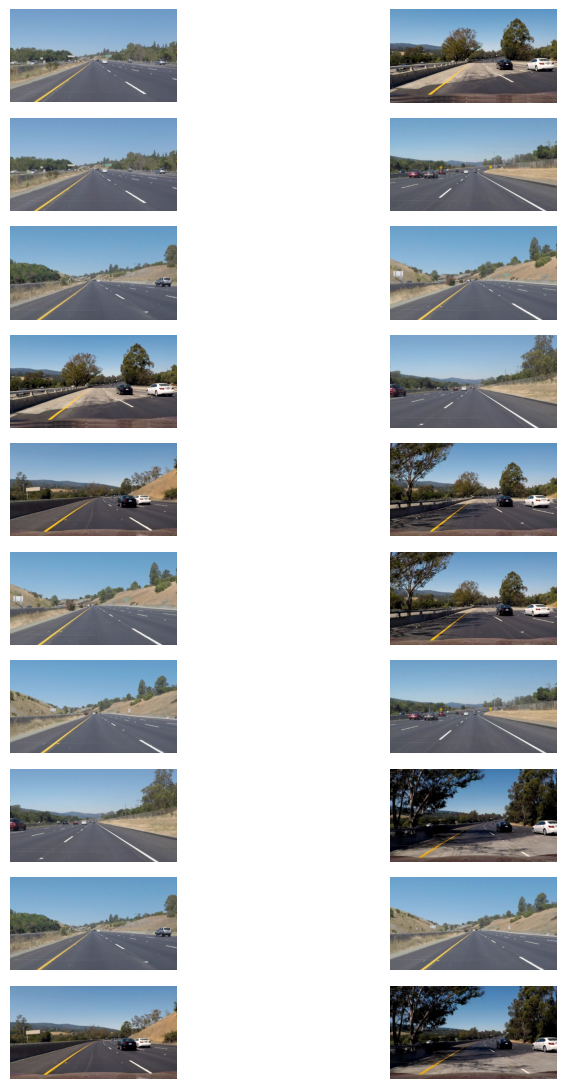

In [ ]:
test_images = [plt.imread(path) for path in glob.glob('test_images/*.jpg')]
show_images(test_images)


In [ ]:
def to_uint8(img):
    if img.dtype != np.uint8:
        img = (img * 255).astype(np.uint8)
    return img


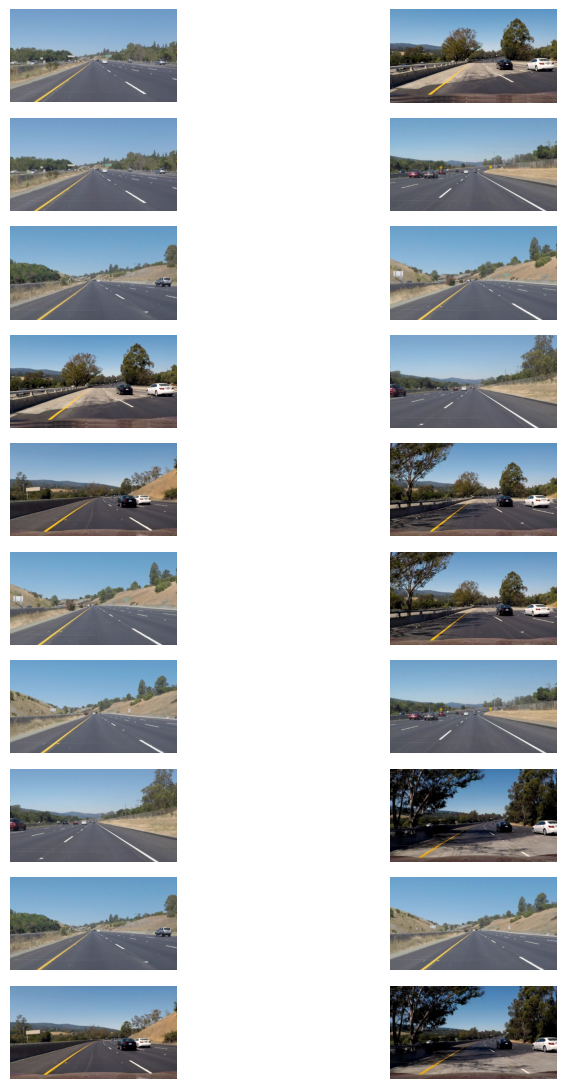

In [ ]:
test_images = [
    cv2.cvtColor(cv2.imread(p), cv2.COLOR_BGR2RGB)
    for p in glob.glob("test_images/*.jpg")
]

test_images = [to_uint8(img) for img in test_images]

show_images(test_images, "Original Images")


In [ ]:
def select_rgb_white_yellow(image):
    white_lower = np.uint8([200, 200, 200])
    white_upper = np.uint8([255, 255, 255])
    white_mask = cv2.inRange(image, white_lower, white_upper)

    yellow_lower = np.uint8([190, 190, 0])
    yellow_upper = np.uint8([255, 255, 255])
    yellow_mask = cv2.inRange(image, yellow_lower, yellow_upper)

    mask = cv2.bitwise_or(white_mask, yellow_mask)
    return cv2.bitwise_and(image, image, mask=mask)


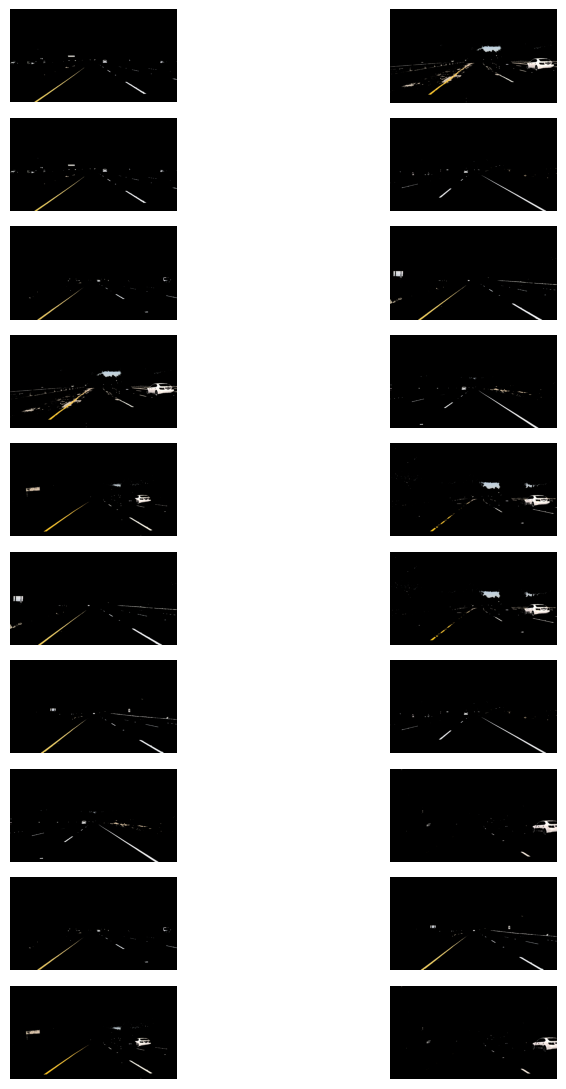

In [ ]:
rgb_filtered = list(map(select_rgb_white_yellow, test_images))
show_images(rgb_filtered, "Step 1.1: RGB White + Yellow")


In [ ]:
def convert_hsv(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2HSV)


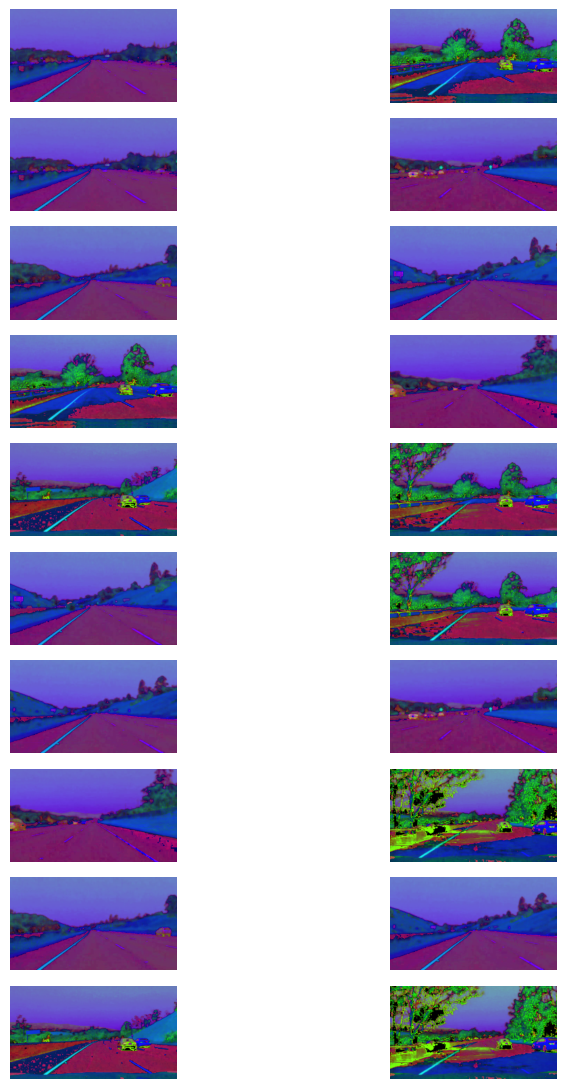

In [ ]:
hsv_images = list(map(convert_hsv, test_images))
show_images(hsv_images, "Step 1.2: RGB to HSV")


In [ ]:
def convert_hls(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2HLS)


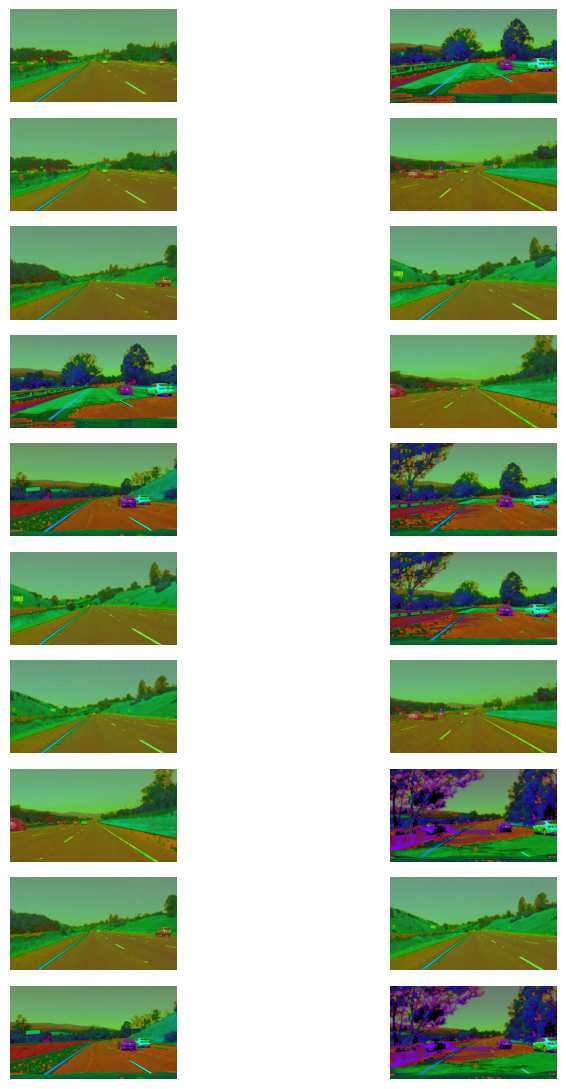

In [ ]:
hls_images = list(map(convert_hls, test_images))
show_images(hls_images, "Step 1.3: RGB to HLS")


In [ ]:
def select_white_yellow(image):
    hls = convert_hls(image)

    white_lower = np.array([0, 200, 0])
    white_upper = np.array([255, 255, 255])

    yellow_lower = np.array([10, 0, 100])
    yellow_upper = np.array([40, 255, 255])

    white_mask = cv2.inRange(hls, white_lower, white_upper)
    yellow_mask = cv2.inRange(hls, yellow_lower, yellow_upper)

    mask = cv2.bitwise_or(white_mask, yellow_mask)
    return cv2.bitwise_and(image, image, mask=mask)


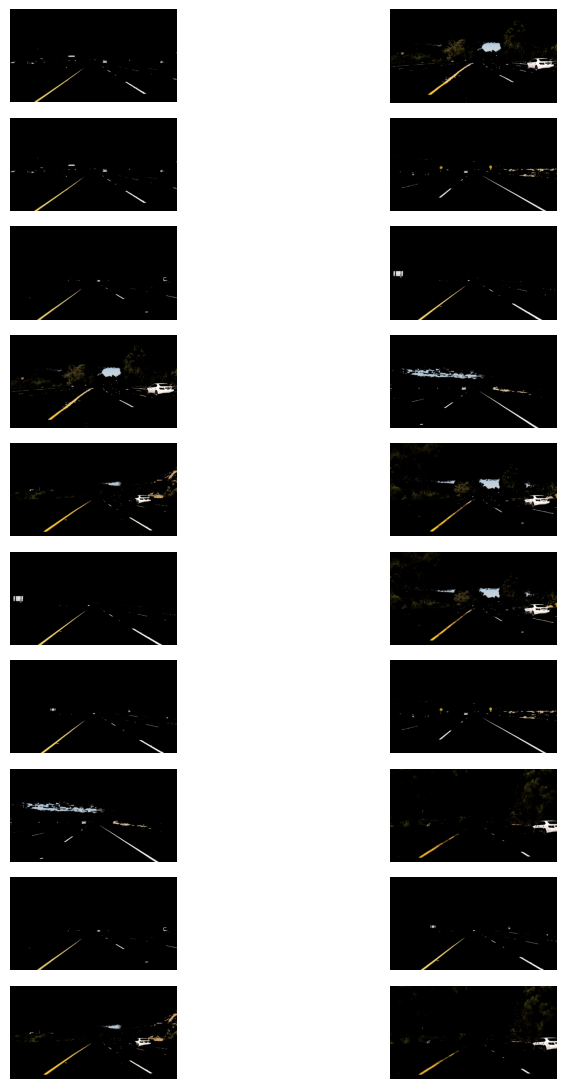

In [ ]:
white_yellow_images = list(map(select_white_yellow, test_images))
show_images(white_yellow_images, "Step 1.4: White + Yellow (HLS)")


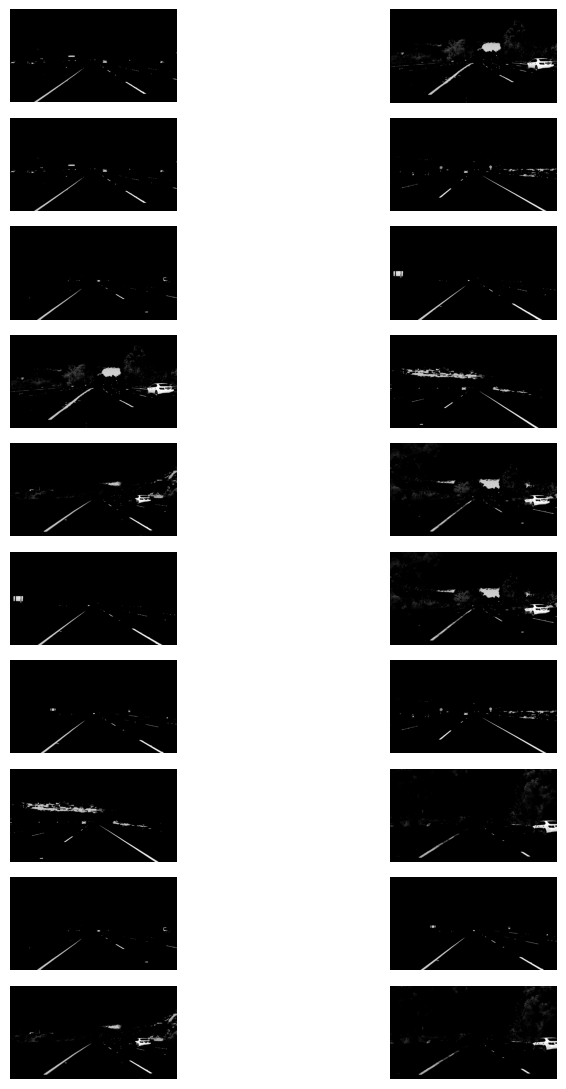

In [ ]:
def convert_gray(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

gray_images = list(map(convert_gray, white_yellow_images))
show_images(gray_images, "Step 2.1: Grayscale")


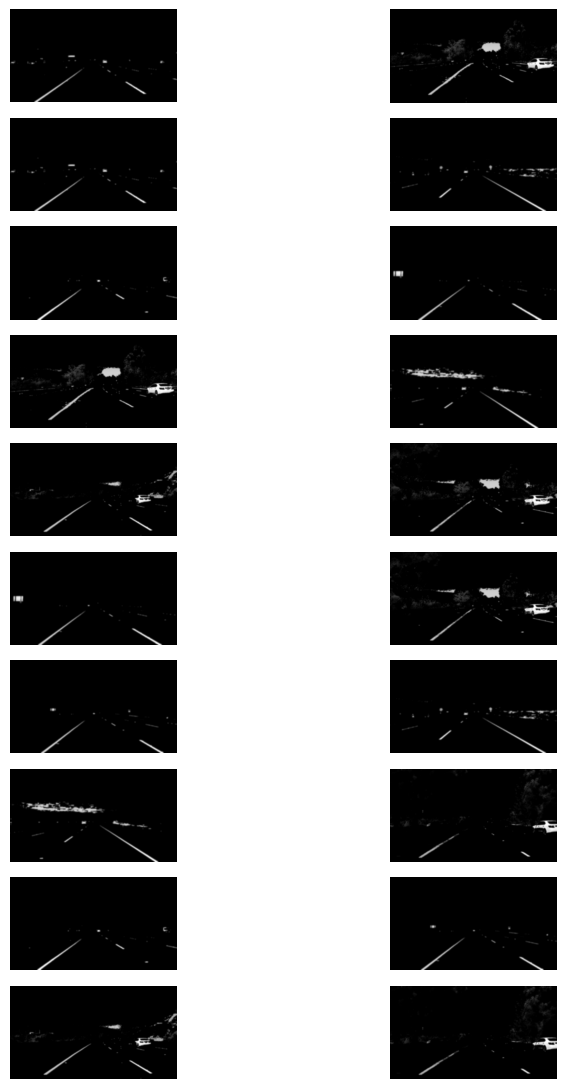

In [ ]:
def gaussian_blur(image, kernel=15):
    return cv2.GaussianBlur(image, (kernel, kernel), 0)

blur_images = list(map(gaussian_blur, gray_images))
show_images(blur_images, "Step 2.2: Gaussian Blur")


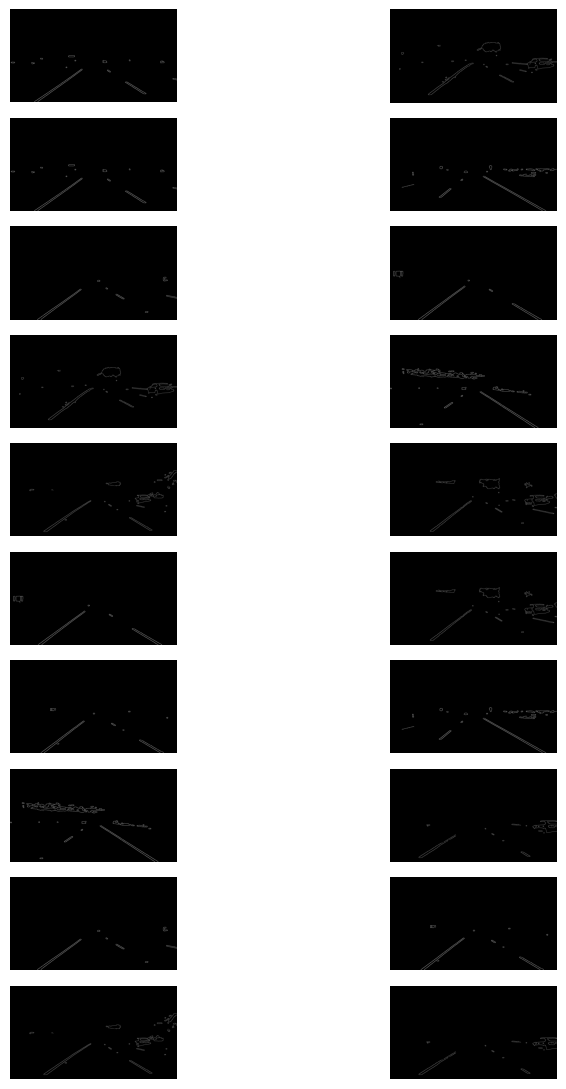

In [ ]:
def canny(image, low=50, high=150):
    return cv2.Canny(image, low, high)

edge_images = list(map(canny, blur_images))
show_images(edge_images, "Step 2.3: Canny Edge Detection")


In [ ]:
def region_of_interest(image):
    height, width = image.shape[:2]

    vertices = np.array([[
        (width * 0.1, height),
        (width * 0.45, height * 0.6),
        (width * 0.55, height * 0.6),
        (width * 0.9, height)
    ]], dtype=np.int32)

    mask = np.zeros_like(image)
    cv2.fillPoly(mask, vertices, 255)
    return cv2.bitwise_and(image, mask)


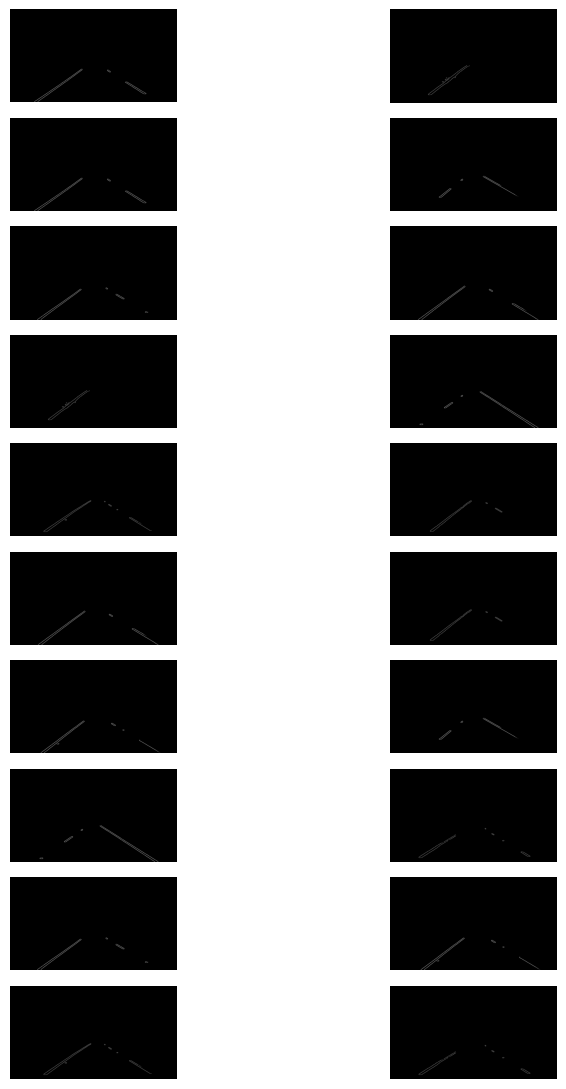

In [ ]:
roi_images = list(map(region_of_interest, edge_images))
show_images(roi_images, "Step 3: Region of Interest")


In [ ]:
def hough_lines(image):
    return cv2.HoughLinesP(
        image, rho=1, theta=np.pi/180,
        threshold=20, minLineLength=20, maxLineGap=300
    )


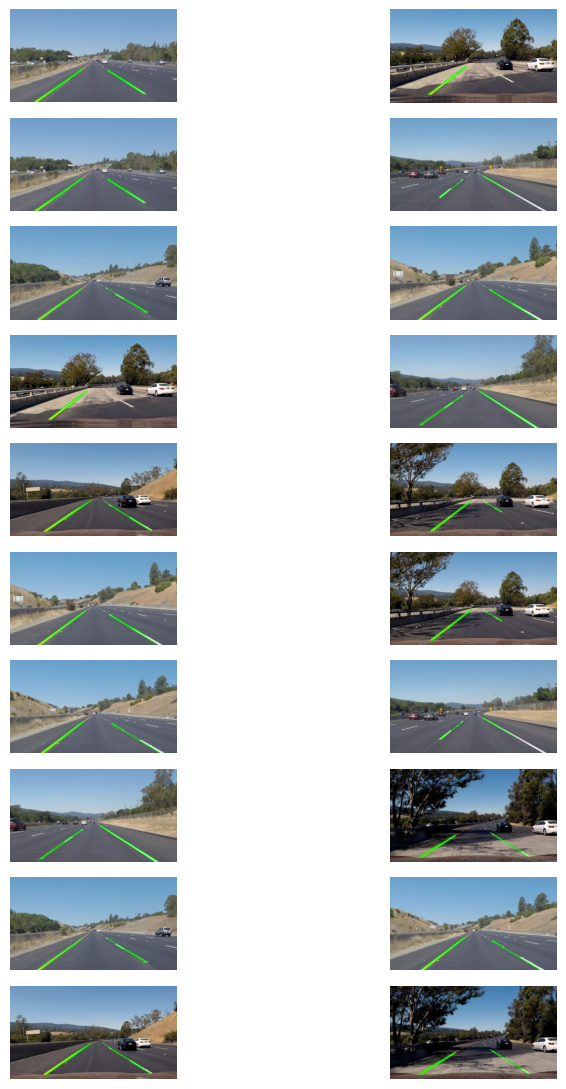

In [ ]:
hough_images = []

for img, roi in zip(test_images, roi_images):
    line_img = img.copy()
    lines = hough_lines(roi)

    if lines is not None:
        for line in lines:
            x1,y1,x2,y2 = line[0]
            cv2.line(line_img, (x1,y1), (x2,y2), (0,255,0), 2)

    hough_images.append(line_img)

show_images(hough_images, "Step 4: Hough Line Detection")


In [ ]:
def draw_lane(image, lines):
    lane_img = np.zeros_like(image)

    if lines is not None:
        for line in lines:
            x1,y1,x2,y2 = line[0]
            cv2.line(lane_img, (x1,y1), (x2,y2), (255,0,0), 10)

    return cv2.addWeighted(image, 1, lane_img, 0.9, 0)


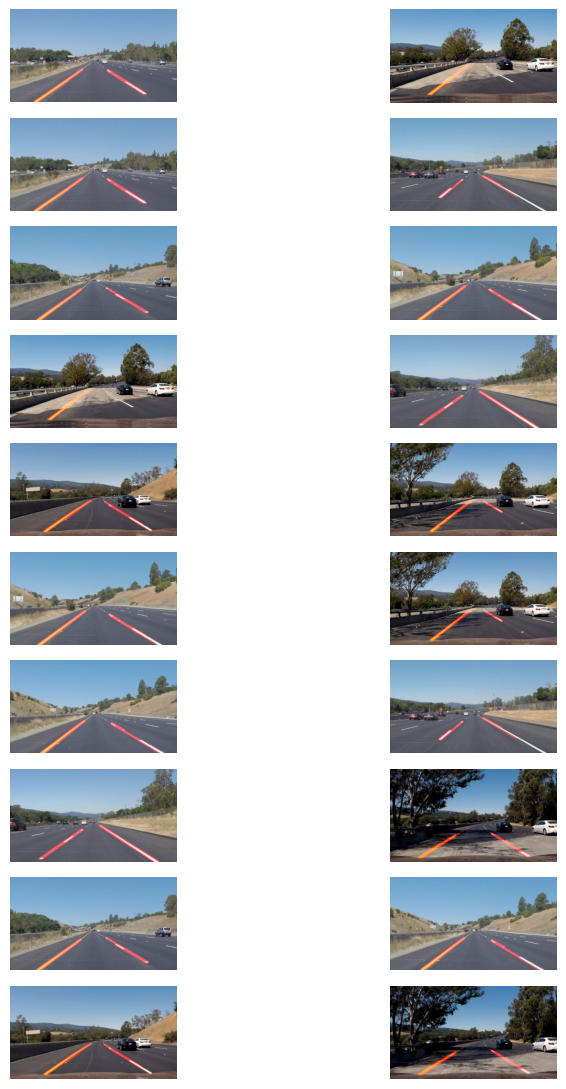

In [ ]:
final_images = []

for img, roi in zip(test_images, roi_images):
    lines = hough_lines(roi)
    final_images.append(draw_lane(img, lines))

show_images(final_images, "Step 5: Final Lane Detection")


In [ ]:
import os

OUTPUT_DIR = "lane_detection_outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)


In [ ]:
def save_images(images, folder_name, gray=False):
    folder_path = os.path.join(OUTPUT_DIR, folder_name)
    os.makedirs(folder_path, exist_ok=True)

    for i, img in enumerate(images):
        save_path = os.path.join(folder_path, f"image_{i+1}.jpg")

        if gray:
            cv2.imwrite(save_path, img)
        else:
            cv2.imwrite(save_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))


In [ ]:
save_images(test_images, "step_0_original")


In [ ]:
save_images(rgb_filtered, "step_1_1_rgb_white_yellow")


In [ ]:
save_images(hsv_images, "step_1_2_hsv")


In [ ]:
save_images(hls_images, "step_1_3_hls")


In [ ]:
save_images(white_yellow_images, "step_1_4_white_yellow_hls")


In [ ]:
save_images(gray_images, "step_2_1_grayscale", gray=True)


In [ ]:
save_images(blur_images, "step_2_2_gaussian_blur", gray=True)


In [ ]:
save_images(edge_images, "step_2_3_canny_edges", gray=True)


In [ ]:
save_images(roi_images, "step_3_roi", gray=True)


In [ ]:
save_images(hough_images, "step_4_hough_lines")


In [ ]:
save_images(final_images, "step_5_final_lane_detection")


In [ ]:
!zip -r lane_detection_outputs.zip lane_detection_outputs


  adding: lane_detection_outputs/ (stored 0%)
  adding: lane_detection_outputs/step_4_hough_lines/ (stored 0%)
  adding: lane_detection_outputs/step_4_hough_lines/image_9.jpg (deflated 1%)
  adding: lane_detection_outputs/step_4_hough_lines/image_14.jpg (deflated 4%)
  adding: lane_detection_outputs/step_4_hough_lines/image_2.jpg (deflated 1%)
  adding: lane_detection_outputs/step_4_hough_lines/image_15.jpg (deflated 1%)
  adding: lane_detection_outputs/step_4_hough_lines/image_8.jpg (deflated 1%)
  adding: lane_detection_outputs/step_4_hough_lines/image_3.jpg (deflated 2%)
  adding: lane_detection_outputs/step_4_hough_lines/image_1.jpg (deflated 2%)
  adding: lane_detection_outputs/step_4_hough_lines/image_20.jpg (deflated 1%)
  adding: lane_detection_outputs/step_4_hough_lines/image_17.jpg (deflated 3%)
  adding: lane_detection_outputs/step_4_hough_lines/image_16.jpg (deflated 1%)
  adding: lane_detection_outputs/step_4_hough_lines/image_13.jpg (deflated 2%)
  adding: lane_detection_

In [ ]:
from google.colab import files
files.download("lane_detection_outputs.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>